In [1]:
import pandas as pd

df = pd.read_csv("dataset.csv")

print(df.head())
print(df.shape)
print(df.info())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("dataset.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.fillna(method='ffill', inplace=True)
df = pd.get_dummies(df, drop_first=True)

C:\Users\Sanmitraa V R\AppData\Local\Temp\ipykernel_17916\2584285097.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [6]:
print(df.columns)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_ID_LP001003',
       'Loan_ID_LP001005', 'Loan_ID_LP001006', 'Loan_ID_LP001008',
       'Loan_ID_LP001011',
       ...
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object', length=628)


In [7]:
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']

In [8]:
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']
X = X.loc[:, ~X.columns.str.startswith('Loan_ID')]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_before = accuracy_score(y_test, y_pred)
print("Accuracy without pruning:", acc_before)

Accuracy without pruning: 0.7154471544715447


In [11]:
dt_pruned = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=10,
    random_state=42
)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)
acc_after = accuracy_score(y_test, y_pred_pruned)
print("Accuracy with pruning:", acc_after)

Accuracy with pruning: 0.7967479674796748


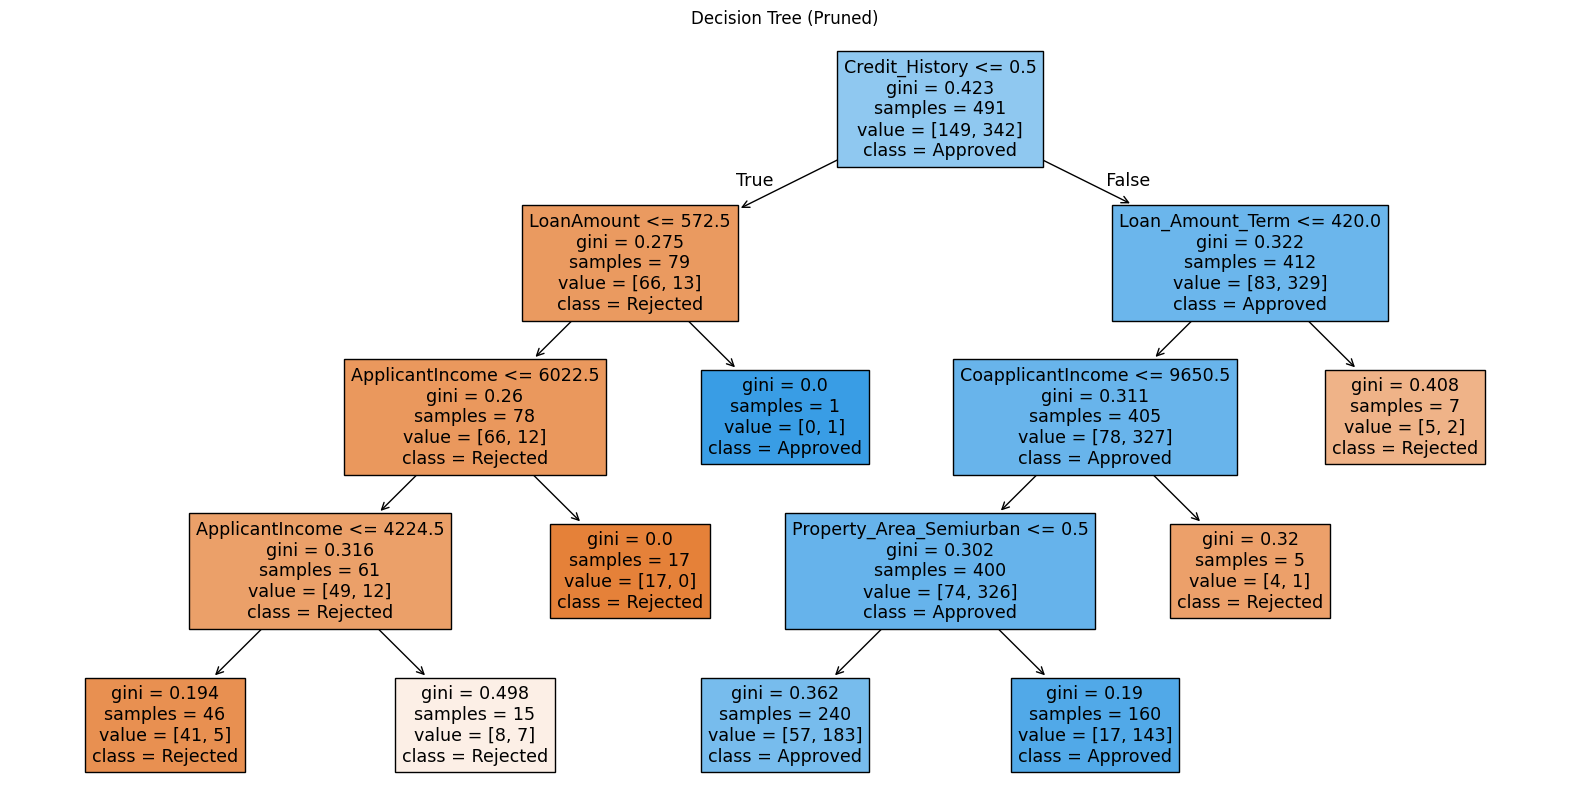

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(
    dt_pruned,
    feature_names=X.columns,
    class_names=['Rejected', 'Approved'],
    filled=True
)
plt.title("Decision Tree (Pruned)")
plt.show()

In [13]:
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_pruned.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance.head())

                    Feature  Importance
4            Credit_History    0.767636
0           ApplicantIncome    0.056584
3          Loan_Amount_Term    0.053956
1         CoapplicantIncome    0.053812
12  Property_Area_Semiurban    0.047646


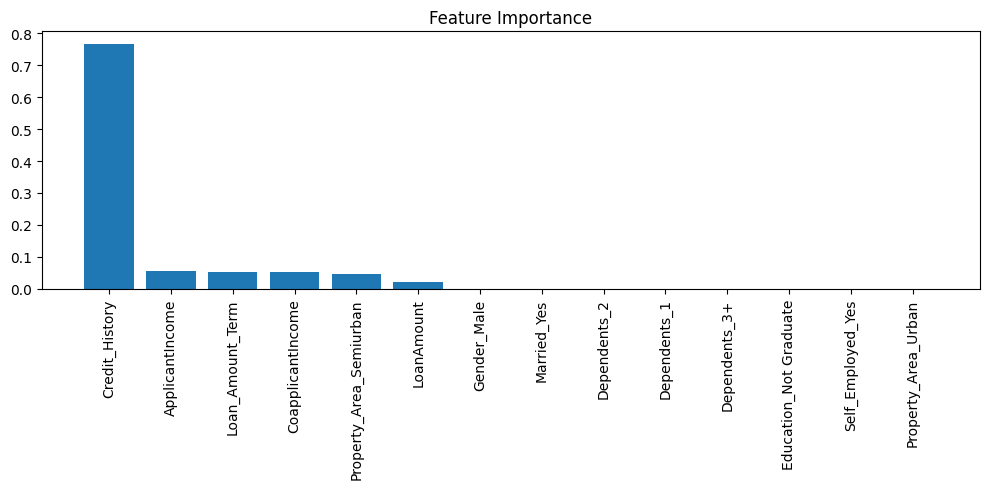

In [14]:
plt.figure(figsize=(10,5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

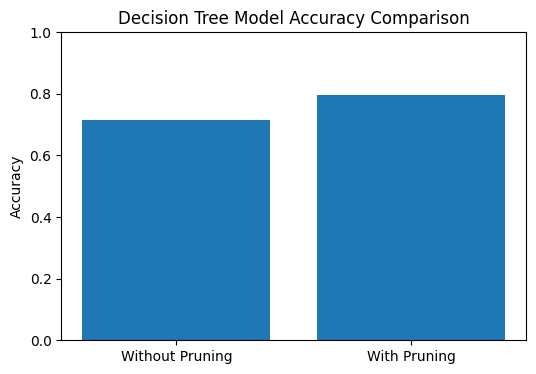

In [17]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
accuracy_before = accuracy_score(y_test, y_pred)
accuracy_after = accuracy_score(y_test, y_pred_pruned)
models = ['Without Pruning', 'With Pruning']
accuracies = [accuracy_before, accuracy_after]
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Decision Tree Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()